In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
books = pd.read_csv("/content/book.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
books['Florence'].value_counts()

0    1783
1     217
Name: Florence, dtype: int64

since columns are columns all categorical and having two classes only, lets do one hot encoding on books data.

In [ ]:
books = pd.get_dummies(books, drop_first=True)

#Apriori Algorithm

In [ ]:
#with minimum support 0.5
frequent_itemsets = apriori(books, min_support=0.5, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/apriori.py:158: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  itemsets = pd.Series([frozenset(i) for i in itemset_dict[k]])


,support,itemsets


with minimum support 0.5 no items found

In [ ]:
#with minimum support 0.4
frequent_itemsets = apriori(books, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


only two items have minimum support greater than 0.4

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


which means based on these items there is no rule which is having lift >0.7.

In [ ]:
#with minimum support 0.2
frequent_itemsets = apriori(books, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


#Rules:
if childBks purchased by customer then he will buy cookBks with support 25% confidence 60%  and lift ratio 1.4.

In [ ]:
#with minimum support 0.1
frequent_itemsets = apriori(books, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
sortedRules = rules.sort_values('lift',ascending = False)
sortedRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


we found almost 100 combinations those are having lift ratio greater than 1

In [ ]:
#sorted rules fetched first 10 those are having confidence more than 0.5
sortedRules[sortedRules.confidence>0.5][1:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657
57,(RefBks),"(ChildBks, CookBks)",0.2145,0.256,0.1225,0.571096,2.230842,0.067588,1.734652
76,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452
83,"(CookBks, ArtBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626
65,"(ChildBks, CookBks)",(GeogBks),0.2560,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
68,(GeogBks),"(ChildBks, CookBks)",0.2760,0.256,0.1495,0.541667,2.115885,0.078844,1.623273


#Rules
#if(childBks,ArtBKS) - Then(GeogBks) with support(0.10),confidence(0.6)and liftRatio(2.27)
#if(childBks,DoitBKS) - Then(ArtBks) with support(0.10),confidence(0.5)and liftRatio(2.24) ....so on

array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>]], dtype=object)

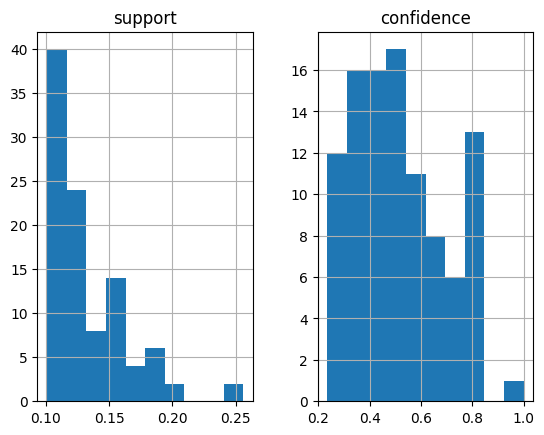

In [ ]:
rules[['support','confidence']].hist()

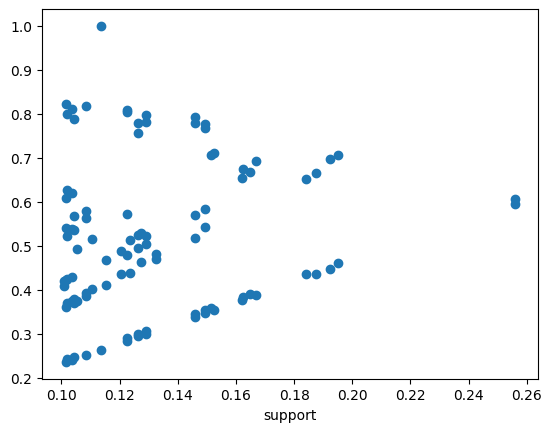

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel("support")
plt.show()

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


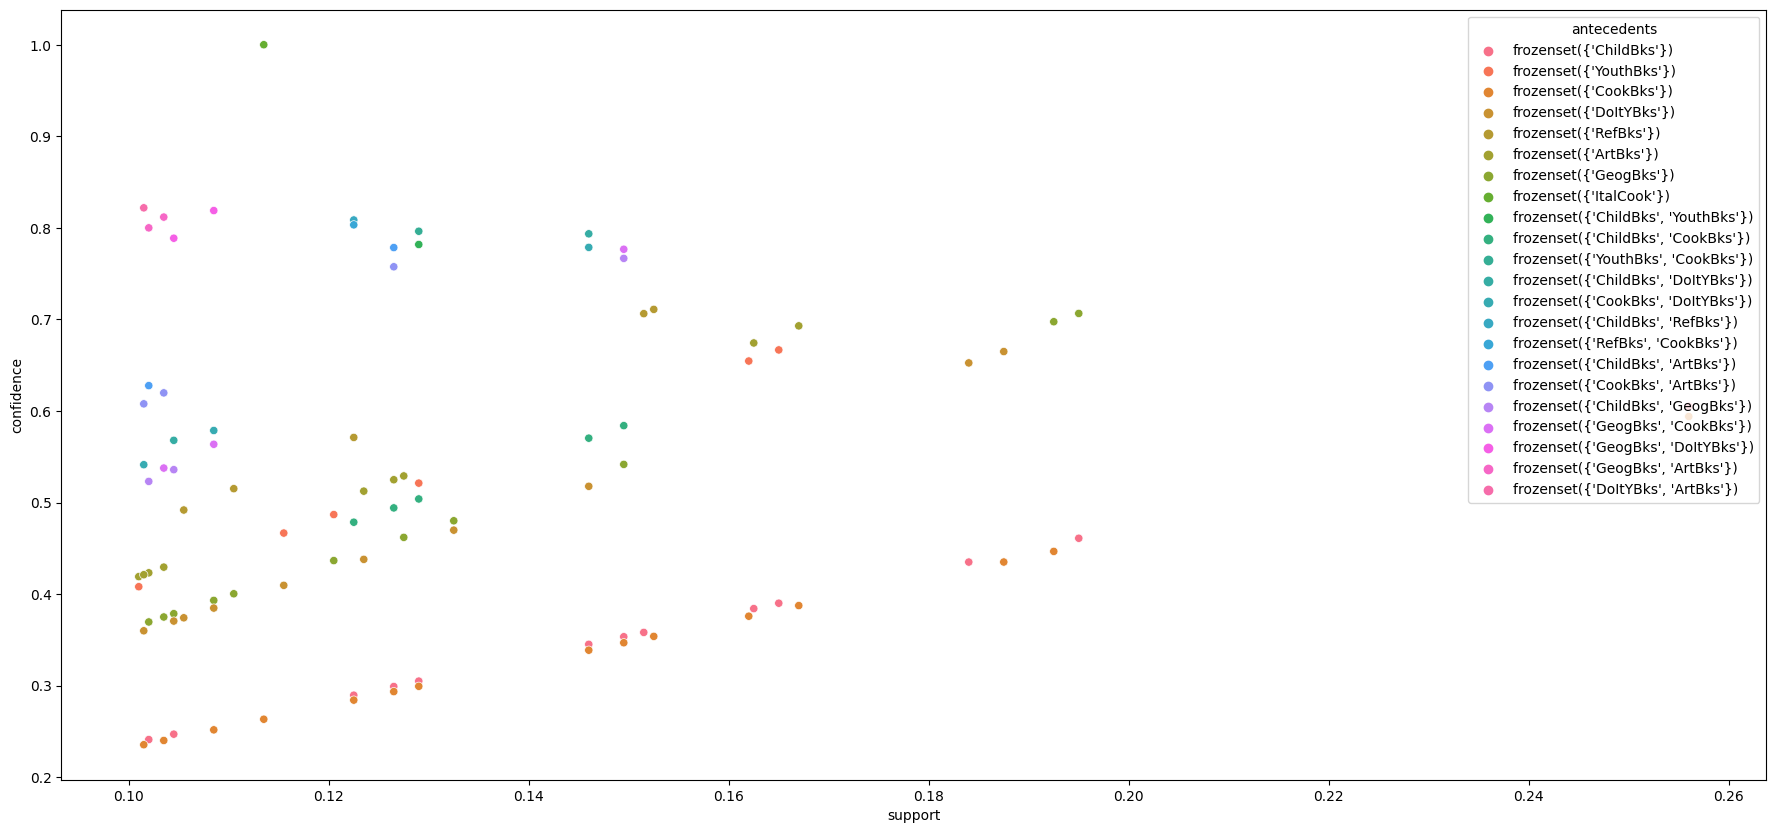

In [ ]:
plt.figure(figsize=(22,10))
sns.scatterplot(x='support', y='confidence', data=rules, hue='antecedents')
plt.show()

few features are increasing support values confidence also increasing.